In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
df=pd.read_csv('loan_train.csv')

In [33]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekday,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0,0


In [53]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

In [63]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekday,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,4,1


In [64]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

In [65]:
df['weekday'] = df['effective_date'].dt.weekday

In [66]:
df['weekend'] = df['weekday'].apply(lambda x: 1 if (x>3)  else 0)

In [68]:
Category = df[['Principal','terms','age','Gender','weekend']]
Category = pd.concat([Category,pd.get_dummies(df['education'])], axis=1)
Category.drop(['Master or Above'], axis = 1,inplace=True)
Category

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


In [69]:
X = Category

In [70]:
y = pd.get_dummies(df['loan_status'])['PAIDOFF'].values

K Nearest Neighbor(KNN)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

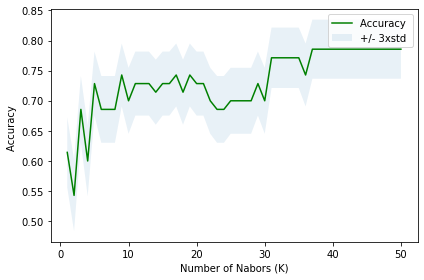

In [72]:
mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,51):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [73]:
mean_acc.max()


0.7857142857142857

In [74]:
mean_acc.argmax()+1

37

The best accuracy was  0.7857142857142857 when k= 37

Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [80]:
y_pred=model.predict(X_test)
DecisionTreeAccuracy=metrics.accuracy_score(y_test,y_pred)
DecisionTreeAccuracy

0.6142857142857143

In [ ]:
The accuracy of decison tree model is 0.6142857142857143

SVM

In [104]:

from sklearn import svm
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)

SVC()

In [105]:
y_pred=svmmodel.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=uint8)

Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lrmodel=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)

In [123]:
y_pred=lrmodel.predict(X_test)
print(lrmodel.predict_proba(X_test))

[[0.32295451 0.67704549]
 [0.25028458 0.74971542]
 [0.18058968 0.81941032]
 [0.31842814 0.68157186]
 [0.23877924 0.76122076]
 [0.20537939 0.79462061]
 [0.27303975 0.72696025]
 [0.24257638 0.75742362]
 [0.31842814 0.68157186]
 [0.29873276 0.70126724]
 [0.30139145 0.69860855]
 [0.31870506 0.68129494]
 [0.29486638 0.70513362]
 [0.29712705 0.70287295]
 [0.13826387 0.86173613]
 [0.16477552 0.83522448]
 [0.3961522  0.6038478 ]
 [0.18361846 0.81638154]
 [0.33624938 0.66375062]
 [0.22107799 0.77892201]
 [0.28403971 0.71596029]
 [0.31011812 0.68988188]
 [0.3587312  0.6412688 ]
 [0.36668443 0.63331557]
 [0.21036655 0.78963345]
 [0.34061581 0.65938419]
 [0.34961925 0.65038075]
 [0.1467569  0.8532431 ]
 [0.34519783 0.65480217]
 [0.1398959  0.8601041 ]
 [0.22240276 0.77759724]
 [0.34397153 0.65602847]
 [0.28135638 0.71864362]
 [0.27709473 0.72290527]
 [0.21009772 0.78990228]
 [0.19606528 0.80393472]
 [0.33624938 0.66375062]
 [0.14255195 0.85744805]
 [0.31313687 0.68686313]
 [0.21412393 0.78587607]


In [124]:
metrics.accuracy_score(y_test,y_pred)

0.7857142857142857

Model evaluation 

In [134]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [141]:
y_pred_knn=knnmodel.predict(X_test)
y_pred_dt=model.predict(X_test)
y_pred_svm=svmmodel.predict(X_test)
y_pred_lr=lrmodel.predict(X_test)
y_pred_lr_proba=lrmodel.predict_proba(X_test)

In [138]:
print(f1_score(y_test,y_pred_knn))
print(f1_score(y_test,y_pred_dt))
print(f1_score(y_test,y_pred_svm))
print(f1_score(y_test,y_pred_lr))

0.88
0.7272727272727274
0.88
0.88


In [139]:
print(jaccard_score(y_test,y_pred_knn))
print(jaccard_score(y_test,y_pred_decisiontree))
print(jaccard_score(y_test,y_pred_svm))
print(jaccard_score(y_test,y_pred_lr))

0.7857142857142857
0.5714285714285714
0.7857142857142857
0.7857142857142857


In [143]:
lr_log_loss=log_loss(y_test,y_pred_lr_proba)
lr_log_loss

0.5435595463663915